In [1]:
import sys
print(sys.version_info)

sys.version_info(major=3, minor=11, micro=4, releaselevel='final', serial=0)


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Exercices

## 1. Manipulation en `pandas`

Le fichier `worldcities` contient des informations au sujet de 42 905 villes.


- 1. 
 - a. Pour chaque pays, trouver la ville la plus peuplée. Afficher le résultat dans une `Serie` ayant en index le nom du pays.
 - b. Pour chaque pays, calculer le nombre de villes ayant une population supérieure à la moitié de la population de la ville la plus peuplée du pays.
 
- 2. 
 - a. Quel est le pays ayant le plus de valeurs manquantes pour la variable population ?
 - b. Quel est le pourcentage de lignes ayant au moins une valeur manquante ?


- 3. 
 - a. Observer l'output de la méthode `.describe` de `pandas`
 - b. Expliquer en Français en découpant en étapes simples, calculer la DataFrame qui est l'output de cette méthode
 - c. Faire de même en SQL
 - d. Écrire une fonction `describe` qui prend en argument une DataFrame et renvoie le même résultat que la méthode `describe`

- 4. 
 - a. À l'aide d'une recherche sur StackOverflow, écrire une fonction `distance_on_globe` qui prend en argument deux points sur le globe (ie deuxcouples de latitude longitude) et qui renvoie la distance en km entre ces deux points
 - b. Quelle est la distance moyenne entre Paris et les villes Allemandes ? 

- 5. 
 - a. Créer une variable `population_group` qui correspond à un groupe de population  : 
     - entre 0 et 250_000 habitants
     - entre 250_001 et 500_000 habitants
     - ...
     - entre 1_750_001 et 2_000_000 habitants
     - Plus de 2_000_001 habitants
    
 - b. Pour chaque pays, calculer le groupe qui compte le plus de villes
 
 
- 6. 
 - a. Créer une variable `population_group_2` qui correspond à un groupe de population : 
     - les 10% villes les moins peuplées
     - les 10% suivant
     - ...
     - les 10% villes les plus peuplées 
(il y a 10 groupes)
 
 - b. Quelle est la population minimale des 10% villes les plus peuplées ?
 
 - c. Tracer un diagramme en baton avec en abscisse le numéro du groupe et en ordonnée la population minimale du groupe

In [28]:
df = pd.read_csv("../data/simplemaps/worldcities.csv")
# df[["city", "population"]]

In [29]:
df.groupby('country').first()['city'].loc['France']

'Paris'

### Question 1.a.

In [30]:
# Méthode 1
# On trie par population 
# pour ensuite sélectionner la première ville pour chaque pays
df.sort_values('population', ascending=False).groupby('country').first()['city']

# Méthode 2
# On peut aussi chercher l'index max de chaque liste de la variable population
# et renvoie la valeur à cette index dans la liste de la variable city
ccp = df.groupby(["country"])[["city", "population"]].agg(list)
ccp["mean_population"] = ccp["population"].map(lambda l: np.nanmean(l))

# On sélectionne pour chaque pays, les villes avec
# une population supérieure à 75 % de la moyenne
population_above_75_percent_of_mean = ccp.apply(
    lambda r: [
        c 
        for c,p in zip(r.city, r.population) if p > 0.75 * r.mean_population],
    axis=1
)
population_above_75_percent_of_mean

ccp

/var/folders/yf/7zryq8v115v8hjpz3_522bvm0000gn/T/ipykernel_16790/32287963.py:10: RuntimeWarning: Mean of empty slice
  ccp["mean_population"] = ccp["population"].map(lambda l: np.nanmean(l))


,city,population,mean_population
country,,,
Afghanistan,"[Kabul, Kandahār, Herāt, Mazār-e Sharīf, Jalāl...","[4273156.0, 614254.0, 556205.0, 469247.0, 2633...",214890.825000
Albania,"[Tirana, Vlorë, Kamëz, Fier, Durrës, Shkodër, ...","[418495.0, 130827.0, 126777.0, 120655.0, 11324...",32773.215686
Algeria,"[Algiers, Oran, Constantine, Blida, Batna, Sét...","[3415811.0, 852000.0, 448374.0, 331779.0, 2906...",88606.736842
American Samoa,[Pago Pago],[12576.0],12576.000000
Andorra,"[Andorra la Vella, Escaldes-Engordany, Encamp,...","[22615.0, 14521.0, 12338.0, 10076.0, 9156.0, 4...",11050.571429
...,...,...,...
Wallis And Futuna,"[Mata-Utu, Leava]","[nan, nan]",NaN
West Bank,[Al Quds],[nan],NaN
Yemen,"[Sanaa, Ta‘izz, Al Ḩudaydah, Aden, Ibb, Ibb, D...","[2957000.0, 615467.0, 548433.0, 507355.0, 3508...",174713.842105


### Question 1.b

In [31]:
max_population_in_country = df.sort_values("population", ascending=False).groupby("country").first()["population"]
df["max_population_in_country"] = df.country.map(max_population_in_country)

# Tout le temps la valeur de Tokyo : environ 40M d'habitants
print(df[df.country=="Japan"].max_population_in_country.unique())

# On garde les lignes (donc les villes) qui ont une valeur de population
# Supérieur à la population max dans une ville du pays divisée par 2
subset = df[df["population"] > (df["max_population_in_country"] / 2)]

# Aucune valeurs manquantes
assert (~df.country.isnull()).sum() == len(df)

subset.groupby("country").size().sort_values(ascending=False)

[39105000.]


country
Malta            8
China            6
Liechtenstein    6
Taiwan           5
Kosovo           5
                ..
Indonesia        1
Iran             1
Iraq             1
Ireland          1
Zimbabwe         1
Length: 224, dtype: int64

### Question 2.a
- Slovénie avec 140 valeurs nulles

In [32]:
# On crée 'un mask' dans une nouvelle volonne
df["is_population_null"] =  df.population.isnull()
df.groupby("country").is_population_null.sum().sort_values(ascending=False).head(1)

country
Slovenia    140
Name: is_population_null, dtype: int64

### Question 2.b

In [33]:
# Qui vaut True si au moins une valeurs nulles
df["has_any_null"] = df.isnull().any(axis=1)

percent = round(100 * df["has_any_null"].sum() / (df.shape[0]), 2)
print(f'Il y a {percent}% des lignes qui ont au moins une valeur manquante')

# Note : les colonnes et les lignes sont des séries
# avec axis, on change le sens dans lequel on fait une opération vectorisée


# Explications any & all

# Any & All en Pandas
all_pandas = pd.Series([True, True, True]).all()
print(all_pandas)
any_pandas = pd.Series([True, False, False]).any()
print(any_pandas)

# Any & All en Python
all_python = all([True, True, True])
print(all_python)
any_python = any([True, False, True])
print(any_python)

Il y a 78.94% des lignes qui ont au moins une valeur manquante
True
True
True
True


### Question 3.
- `.describe` renvoie des statistiques (**uniquement**) pour les variables quantitatives
    - `count` : le nombre de valeurs non nulles
    - `mean` : la moyenne des valeurs non nulles 
    - `std` : l'écart type (standard deviation) des valeurs non nulles
    - `min` : le min des valeurs non nulles
    - `25%` : le premier quartile des valeurs non nulles
    - `50%` : le deuxieme quartile des valeurs non nulles
    - `75%` : le troisieme quartile des valeurs non nulles
    - `max` : le min des valeurs non nulles


In [34]:
# COMPRENDRE np.mean, np.nanmean, et .mean

l = [0, 10, 20] # la moyenne 10
l_with_nan = [0, 10, 20, np.nan] # la moyenne doit être 10 ! (on exclut au numérateur et au dénominateur les np.nan)
print(np.mean(l))
print(np.nanmean(l_with_nan))

pd.Series(l).mean()
pd.Series(l_with_nan).mean()  # calcule dirrectement avec np.nanmean

10.0
10.0


10.0

In [35]:
df = pd.read_csv("../data/simplemaps/worldcities.csv")
df.describe()

# EN SQL : 
## pour les colonnes INTEGER, FLOAT ...
## on calculerait COUNT(*), MEAN(*) etc...

def describe_not_pandaesque(df):
    
    # Filtrer pour ne garder que les variables quantitatives
    df = df.select_dtypes(include=np.number)
    
    # Itérer sur les fonctions statistiques
    stat_funcs = {
        # count : la longueur de la liste qui contient les valeurs non nulles
        "count": lambda s: len([value for value in s if not np.isnan(value)]),
        # La moyenne
        "mean": np.nanmean,
        # Ecart type
        "std": np.nanstd,
        # Min
        "min": np.nanmin,
        # Percentile 25
        "25%": lambda s: np.nanpercentile(s, 25),
        # Percentile 50
        "50%": lambda s: np.nanpercentile(s, 50),
        # Percentile 75
        "75%": lambda s: np.nanpercentile(s, 75),   
        # Max
        "max": np.nanmax
    }
    
    # Calcule des statistics
    statistics = []
    for func in stat_funcs.values() :
        row = []
        # Calculer chacune des lignes (en itérant sur les variables) et la stocker dans une liste
        for variable in df.columns:
            stat = func(df[variable])
            row.append(stat)
        statistics.append(row)
        
    # Créer une DataFrame à partir de ces données
    # Spécifier les bons noms de colonnes et d'index
    statistics = pd.DataFrame(
        statistics,
        index=stat_funcs.keys(),
        columns=df.columns   
    )
    return statistics


def describe_pandaesque(df):
    pass

df_describe = describe_not_pandaesque(df)
# Variation relative = (exp - th) / th
# experimentale = la nôtre df_describe
# théorique = celle de pandas

# Toutes les valeurs ont 0% d'écart 
# sauf les écart types qui ont autour de 0.0012 % d'écart
100 * (df_describe - df.describe()) / df.describe()

,lat,lng,population,id
count,0.000000,0.000000,0.000000,0.000000
mean,0.000000,0.000000,0.000000,0.000000
std,-0.001165,-0.001165,-0.001185,-0.001165
min,-0.000000,-0.000000,NaN,0.000000
25%,0.000000,-0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000
max,0.000000,0.000000,0.000000,0.000000


### Question 4
- from : https://stackoverflow.com/questions/19412462/getting-distance-between-two-points-based-on-latitude-longitude

In [36]:
from math import sin, cos, sqrt, atan2,  pi

marseille = df[df.city=='Marseille'].iloc[0]
paris = df[df.city=='Paris'].iloc[0]

def compute_distance_on_globe(lat1, lon1, lat2, lon2):

    # Approximate radius of earth in km
    R = 6373.0

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    
    return distance


########## CONVERSION DEGRÉS VERS RADIANS 
########## : fois Pi puis divisé par 180
lat1 = marseille.lat * pi / 180
lon1 = marseille.lng  * pi / 180

lat2 = paris.lat * pi / 180
lon2 = paris.lng * pi / 180

distance = compute_distance_on_globe(lat1, lon1, lat2, lon2)

print(f"Distance Paris à Marseille: {round(distance, 2)} km")

Distance Paris à Marseille: 660.7 km


### Question 5.a & 6.a

In [37]:
# Float !!
df.population

0        39105000.0
1        35362000.0
2        31870000.0
3        23971000.0
4        22495000.0
            ...    
42900          10.0
42901          10.0
42902          10.0
42903          10.0
42904           0.0
Name: population, Length: 42905, dtype: float64

In [38]:
print(249_999 // 250_000)
print(500_001 // 250_000)
print(750_004 // 250_000)
print(784_564 // 250_000)
print(2_000_156 // 250_000)
print(3_000_156 // 250_000)

0
2
3
3
8
12


In [39]:
def get_population_group(pop):
    if np.isnan(pop):
        return np.nan
    elif pop > 2_000_000:
        return 8
    return int(pop) // 250_000

df["population_group"] = df["population"].map(get_population_group)
print(df["population_group"].value_counts())

# Valeurs nulles
print(df.population.isnull().sum())
print(df.population.isna().sum())

np.nanpercentile(df["population"], 0)
np.nanpercentile(df["population"], 100)

percentiles = [
    np.nanpercentile(df["population"], percent*10)
    for percent in range(0, 11)
]

def get_population_group_2(pop, percentiles):
    if np.isnan(pop):
        return np.nan
    
    for group, p in enumerate(percentiles):
        # Dans le pire des cas des cas
        # le test réussi pour le dernier percentile car c'est le max
        
        # Une seule classe pour le min == 0 et le premier groupe
        if pop >= p:
            continue
        else:
            return group
    
    # Shouldnt be attained but as a security
    return 9
    
df["population_group"] = df["population"].map(
    lambda pop: get_population_group_2(pop, percentiles)
)
df["population_group"].value_counts()

population_group
0.0    39892
1.0      997
2.0      408
8.0      381
3.0      183
4.0      149
5.0       73
6.0       57
7.0       40
Name: count, dtype: int64
725
725


population_group
5.0     4220
3.0     4220
9.0     4219
8.0     4218
7.0     4218
6.0     4218
10.0    4217
2.0     4217
1.0     4217
4.0     4216
Name: count, dtype: int64

In [40]:
df["population_group"].value_counts()

population_group
5.0     4220
3.0     4220
9.0     4219
8.0     4218
7.0     4218
6.0     4218
10.0    4217
2.0     4217
1.0     4217
4.0     4216
Name: count, dtype: int64

## 2. Régression linéaire simple : comparaison
L'objectif est de comparer trois implémentations de la régression linéaire : 
- une en utilisant `sklearn` 
- une en utilisant `statsmodels` 
- l'une en calculant les coefficients "à la main" 


On a généré ci-dessous un nuage de points, on a représenté $Y$ en fonction de $X$.

L'objectif de la régression linéaire simple sans intercepte est de trouver deux coefficients $a$ et $b$ tels que :

$$ Y = ax  + err $$


L'objectif de la régression linéaire simple avec intercepte est de trouver deux coefficients $a$ et $b$ tels que :

$$ Y = ax + b + err $$


1. Entraîner un modèle de régression linéaire entre $x$ et $y$ avec `scikit-learn`
2. Entraîner un modèle de régression linéaire entre $x$ et $y$ avec `statsmodels` (on pourra s'aider de StackoVerflow)
3. Entraîner un modèle de régression linéaire entre $x$ et $y$ en remarquant que le coefficient $a$ est égale à $\frac{Cov(X, Y)}{Var(X}$ (on pourra chercher comment calculer la covariance et la variance en `pandas` ou `numpy`).
4. Créer une colonne `y_pred` qui contient les prédictions pour toutes les données à disposition

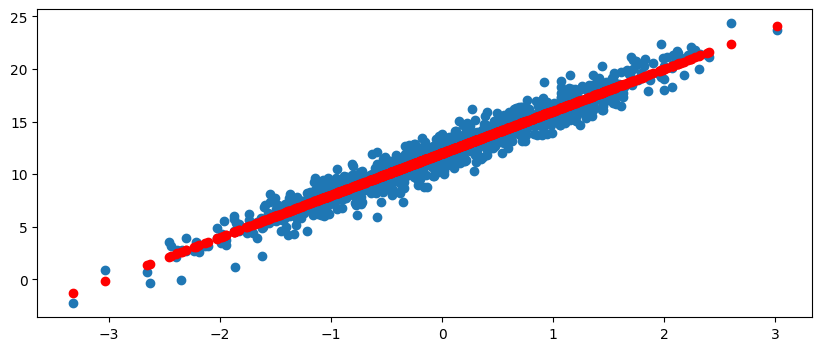

In [41]:
import numpy as np
import matplotlib.pyplot as plt


N_OBS = 1000
A = 4
B = 12

x = np.random.randn(1000)  # 4 lignes, 2 colonnes
errors = np.random.randn(1000) 
y = A*x + B + errors

plt.figure(figsize=(10, 4))
plt.scatter(x, y)
plt.scatter(x, A*x + B, color="red")

## Question 1

### On a Y = a*X


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

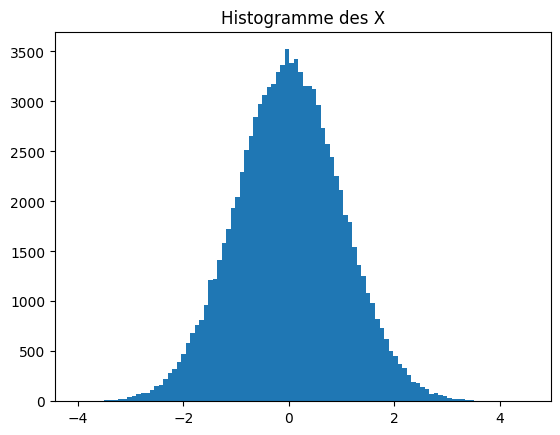

[10.02422654]


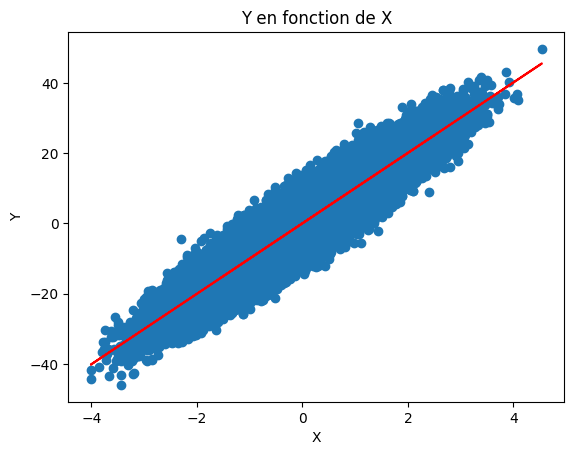

In [28]:
from sklearn.linear_model import LinearRegression


X =  pd.Series(np.random.randn(100_000)) 
errors = np.random.randn(100_000) * 4
Y = 10 * X + errors

# Des valeurs aléatoires (qui peuvent être arbitrairement grandes ou petites)
# Mais dont l'immense majorité sera entre -4 et 4
plt.hist(X, bins=100)
plt.title("Histogramme des X")
plt.show()


# On crée une instance de modèle
lr = LinearRegression(fit_intercept=False)
# le premier argument soit les X avec les quels on apprend (dans une DataFrame)
# le deuxieme argument de la "TARGET" (ie ce qu'on veut prédire) 
# X.to_frame() -> pour avoir quelque chose de bi-dimensionnel
lr.fit(X.to_frame(),Y)
print(lr.coef_)
predictions = lr.predict(X.to_frame())

plt.scatter(X, Y)
plt.title("Y en fonction de X")
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(X, predictions, color="red")

### On a Y = a*X + b
- L'intercept est la valeur `b`  (FR : ordonnée à l'origine)

[10.0081904] 139.98289312326958


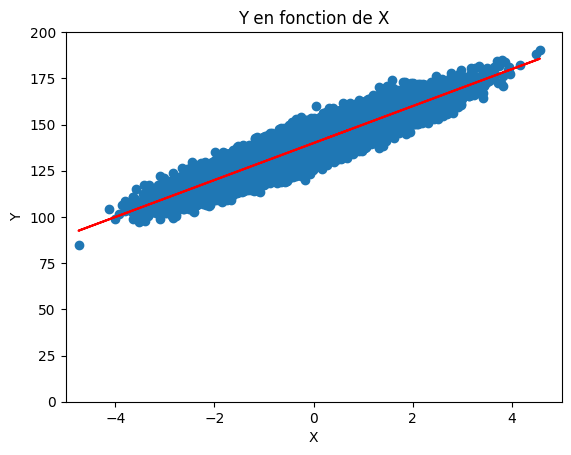

In [9]:
X =  pd.Series(np.random.randn(100_000)) 
errors = np.random.randn(100_000) * 4
Y = 10*X + 140 + errors

# On crée une instance de modèle AVEC UN INTERCEPT
lr = LinearRegression(fit_intercept=True)

lr.fit(X.to_frame(),Y)
predictions = lr.predict(X.to_frame())

plt.scatter(X, Y)
plt.title("Y en fonction de X")
plt.xlim(-5, 5)
plt.ylim(0, 200)
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(X, predictions, color="red")

print(lr.coef_, lr.intercept_)

**Une prédiction individuelle**

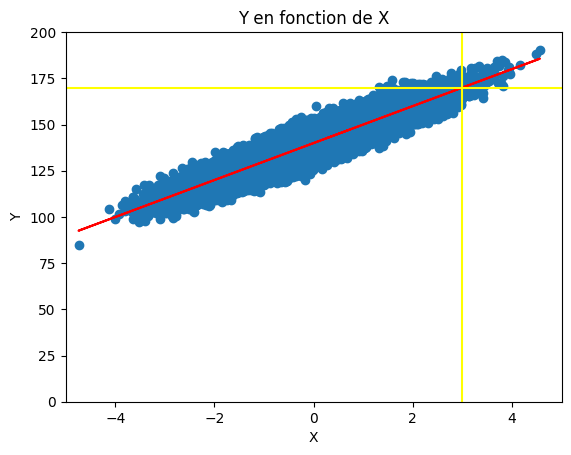

In [10]:
x = 3
prediction = lr.predict([[x]])

plt.scatter(X, Y)
plt.title("Y en fonction de X")
plt.xlim(-5, 5)
plt.ylim(0, 200)
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(X, predictions, color="red")

# Where is the prediction ?
plt.axvline(x, color="yellow")
plt.axhline(prediction, color="yellow")

## Question 2
### On va fiter un modèle de la forme $Y=aX$

In [29]:
#### On génère les données


X =  pd.Series(np.random.randn(100_000)) 
errors = np.random.randn(100_000) * 4
Y = 10*X + errors


#### On fit un modèle avec statsmodel

import statsmodels.api as sm
model = sm.OLS(Y, X.to_frame())
results = model.fit()
print(results.params) # comme l'attribut coef_ dan scikit-learn)


# On crée une instance de modèle AVEC UN INTERCEPT
lr = LinearRegression(fit_intercept=False)
lr.fit(X.to_frame(),Y)
print(lr.coef_)

0    10.002519
dtype: float64
[10.00251867]


In [35]:
# X.to_frame(), 
sm.add_constant(X)

,const,0
0,1.0,-0.526533
1,1.0,0.429716
2,1.0,-1.007615
3,1.0,2.438142
4,1.0,0.874946
...,...,...
99995,1.0,-0.229622
99996,1.0,-0.890470
99997,1.0,0.520596
99998,1.0,0.845468


$Y = a \times x + b \times 1 = ax + b$

In [30]:
#### On génère les données
X =  pd.Series(np.random.randn(100_000)) 
errors = np.random.randn(100_000) * 4
Y = 10*X  + 4 + errors

#### On fit un modèle avec statsmodel
X_with_constant = sm.add_constant(X)
X_with_constant.columns = X_with_constant.columns.map(str)
model = sm.OLS(Y, X_with_constant)
results = model.fit()
print(results.params)

#X_with_constant.apply(
#    lambda r: results.params['const']*r['const'] + results.params[0]*r[0],
#    axis=1 
#)

#### On fit un modèle avec sklearn
lr = LinearRegression(fit_intercept=True)
lr.fit(X.to_frame(),Y)
print(lr.intercept_, lr.coef_)

const     4.008154
0        10.003691
dtype: float64
4.008153851390235 [10.00369116]


### Question 3

$a = \frac{Cov(X, Y)}{\sqrt{Var(X)}}$

In [41]:
X =  pd.Series(np.random.randn(100_000)) 
Y = 10*X  +  np.random.randn(100_000) * 4

In [42]:
### Avec la formule (dans le cas $Y=aX$ ie sans intercept et avec un seul X)

# Matrice de Covariance 
np.cov(X, Y)
#[
#    
#    [Cov(X, X), Cov(X, Y)],
#    [Cov(Y, X), Cov(Y, Y)]
#]

array([[  0.99636463,   9.96657898],
       [  9.96657898, 115.5905125 ]])

In [43]:
cov_x_y = np.cov(X, Y)[0][1] 
var_x = np.var(X)

a = cov_x_y / np.sqrt(var_x)
print(a)

9.984794527673628


### Question 4

In [23]:
y_pred = [a * x for x in X.values]

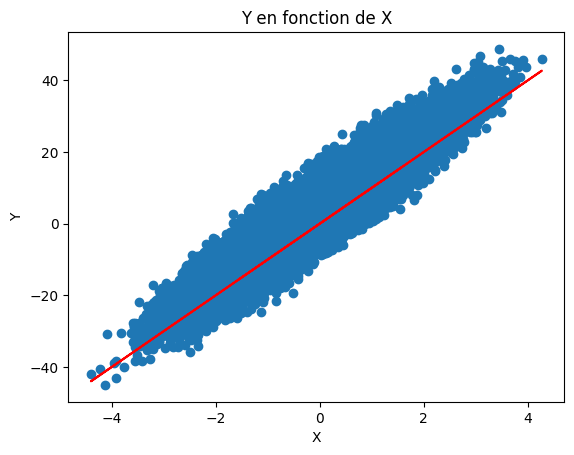

In [24]:
plt.scatter(X, Y)
plt.title("Y en fonction de X")
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(X, y_pred, color="red")

# Drafts exercice 2

In [ ]:
from sklearn.linear_model import LinearRegression


# ValueError: Expected 2D array, got 1D array instead:

# Car x_example n'est pas une liste de liste


x_example = [
    1,
    2,
    3,
    4
]
y_example = [
    1,
    3,
    5,
    7
]
lr = LinearRegression()


try:
    lr.fit(x_example, y_example)
except Exception as e:
    print(e)

x_example = [
    [1],
    [2],
    [3],
    [4]
]
y_example = [
    1,
    3,
    5,
    7
]
lr.fit(x_example, y_example)






from sklearn.linear_model import LinearRegression

# Solution 1
x_reshaped = x.reshape(-1, 1)

# Solution 2
## x (numpy array) -> pd.Series(x) (Serie en pandas : 1D) 
## -> .to_frame() (Dataframe en pandas : 2D)

import pandas as pd


x_reshaped_2 = pd.Series(x).to_frame()

# Fit_intercept=False pour calibrer y = ax
lr_without_intercept = LinearRegression(fit_intercept=False)
lr_without_intercept.fit(x_reshaped_2, y)
print(lr_without_intercept.coef_)

# Fit_intercept=True pour calibrer y = ax + b
lr_with_intercept = LinearRegression(fit_intercept=True)
lr_with_intercept.fit(x_reshaped_2, y)
print(lr_with_intercept.coef_, lr_with_intercept.intercept_)




plt.figure(figsize=(10, 4))
plt.scatter(x, y)
plt.scatter(x, A*x + B, color="red")

pred_without_intercept = lr_without_intercept.predict(x_reshaped_2)
pred_with_intercept = lr_with_intercept.predict(x_reshaped_2)


# Prédiction tout le temps décalée vers le bas de 12
plt.plot(x, pred_without_intercept, color="green")
# Prédiction très décente car on a bien un intercept
plt.plot(x, pred_with_intercept, color="yellow")